In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = yf.download('PTC', start = '2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()

In [4]:
df = df.dropna()

In [5]:
# df

In [6]:
Buy = []
Sell = []

for i in range(len(df)):
    if df.MA20.iloc[i] > df.MA50[i] \
    and df.MA20.iloc[i-1] < df.MA50[i-1]:
        Buy.append(i)
    elif df.MA20.iloc[i] < df.MA50[i] \
    and df.MA20.iloc[i-1] > df.MA50[i-1]:
        Sell.append(i)

C:\Users\comp\AppData\Local\Temp\ipykernel_18204\1129449444.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.MA20.iloc[i] > df.MA50[i] \
C:\Users\comp\AppData\Local\Temp\ipykernel_18204\1129449444.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df.MA20.iloc[i] < df.MA50[i] \
C:\Users\comp\AppData\Local\Temp\ipykernel_18204\1129449444.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and df.MA20.iloc[i-1] > df.MA5

In [7]:
Buy

[25, 165]

In [8]:
Sell

[126, 278]

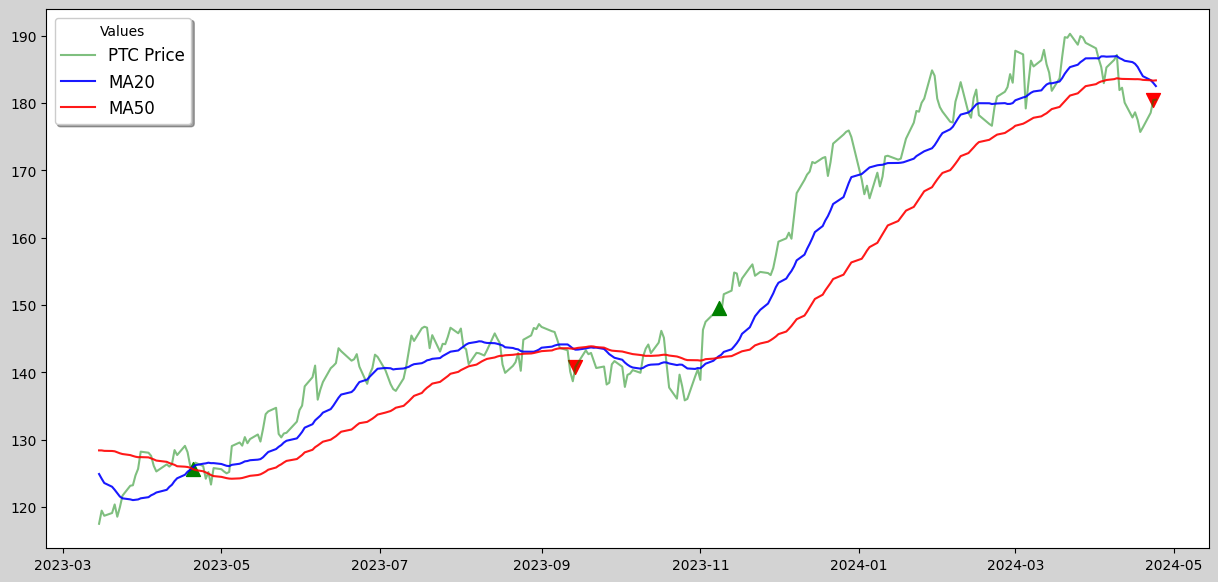

In [9]:
plt.figure(figsize=(15, 7), facecolor='lightgray', edgecolor='black')
plt.plot(df['Adj Close'], label = 'PTC Price', c='g', alpha=0.5)
plt.plot(df['MA20'], label = 'MA20', c='b', alpha = 0.9)
plt.plot(df['MA50'], label = 'MA50', c='r', alpha = 0.9)
#                  X                      Y
plt.scatter(df.iloc[Buy].index,df.iloc[Buy]['Adj Close'], marker = '^',color = 'g', s = 100)
plt.scatter(df.iloc[Sell].index,df.iloc[Sell]['Adj Close'], marker = 'v',color = 'r', s = 100)
plt.legend(loc='upper left', title='Values', fontsize='large', fancybox=True, shadow=True)
plt.show()

In [10]:
# BackTesting 
Realbuys = [i for i in Buy]
Realsell = [i for i in Sell]

In [11]:
Buyprices = df.Open.iloc[Realbuys]
Sellprices = df.Open.iloc[Realsell]

In [12]:
if Sellprices.index[0] < Buyprices.index[0]:
    Sellprices = Sellprices.drop(Sellprices.index[0])
elif Buyprices.index[-1] > Sellprices.index[-1]:
    Buyprices = Buyprices.drop(Buyprices.index[-1])

In [13]:
profitsrel = []

for i in range(len(Sellprices)):
    profitsrel.append(((Sellprices[i] - Buyprices[i])/Buyprices[i])*100)

C:\Users\comp\AppData\Local\Temp\ipykernel_18204\2743168462.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  profitsrel.append(((Sellprices[i] - Buyprices[i])/Buyprices[i])*100)


In [14]:
profitsrel

[10.796581525197503, 19.545516665493903]

In [15]:
print(f"Total profit from 2023-01-01 is {sum(profitsrel)}%")

Total profit from 2023-01-01 is 30.342098190691406%
